### Dog and Cat classification project

In this project, I have used a dataset of 25,000 images of dog and cat downloaded from internet. Those images are divided into 2 folders which are "train" folder and "test" folder, each folder then is divided into 2 categories which are "CAT" and "DOG".

At the end, my model achived a pretty well accuracy of 97%

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

%matplotlib inline

### Visualizing the Data

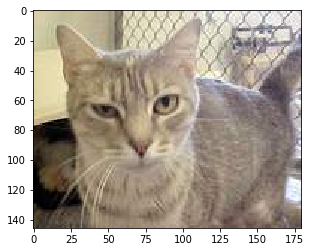

In [21]:
# Show a random images from CAT category 

rand = np.random.randint(0,9373)


cat_rand=cv2.imread("CATS_DOGS/train/CAT/{}.jpg".format(str(rand)))
cat_rand=cv2.cvtColor(cat_rand,cv2.COLOR_BGR2RGB)
plt.imshow(cat_rand)

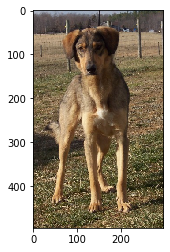

In [22]:
# Show a random images from CAT category 

dog_rand=cv2.imread("CATS_DOGS/train/DOG/{}.jpg".format(str(rand)))
dog_rand=cv2.cvtColor(dog_rand,cv2.COLOR_BGR2RGB)
plt.imshow(dog_rand)

In [28]:
# It should be noticed that our images have different size

print ("Cat: ",cat_rand.shape)
print("Dog: ", dog_rand.shape)

Cat:  (146, 180, 3)
Dog:  (496, 297, 3)


### Import ImageDataGenerator from Keras to pre-process our input images for the model

In [29]:
from keras.preprocessing.image import ImageDataGenerator
"""
rotation_range=30: randomly rotate image angle from 0 to 30 degree
width_shift_range=0.1: randomly stretch the image along x_axis from 0 to 10%
height_shift_range=0.1: randomly stretch the image along y_axis from 0 to 10%
rescale=1/255: rescale image to the range from 0 to 1
shear_range=0.2: randomly crop the image from 0 to 20%
zoom_range=0.2: randomly zoom the image from 0 to 20%
horizontal_flip=True: randomly flip the image in horizontal direction
fill_mode="nearest": During the random image processing, we will fill in the mixing pixels with the nearset ones if they are missing 
"""
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode="nearest")

Using TensorFlow backend.


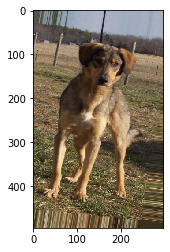

In [30]:
plt.imshow(image_gen.random_transform(dog_rand))

In [31]:
image_gen.flow_from_directory("CATS_DOGS/train")

Found 18743 images belonging to 2 classes.


In [32]:
input_shape = (150,150,3)

In [36]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D

In [37]:
# Create my own Convolutional Neural Network

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))

# Randomly turon 50% of the neurons during training to avoid overfitting
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss = "binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)             0         
__________

In [39]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory("CATS_DOGS/train/",
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode="binary")

Found 18743 images belonging to 2 classes.


In [40]:
test_image_gen = image_gen.flow_from_directory("CATS_DOGS/test/",
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode="binary")

Found 6251 images belonging to 2 classes.


In [41]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

### Train and save my model

In [42]:
results=model.fit_generator(train_image_gen,epochs=100,steps_per_epoch=150,
                           validation_data=test_image_gen,validation_steps=12)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 65/150 [============>.................] - ETA: 40s - loss: 0.6992 - acc: 0.5202

/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 209715200 bytes but only got 0. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 52428800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6468665344 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 7027. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 422313984 bytes but only g

150/150 [==============================] - 65s 430ms/step - loss: 0.6950 - acc: 0.5346 - val_loss: 0.6840 - val_acc: 0.5208
Epoch 2/100
 94/150 [=================>............] - ETA: 21s - loss: 0.6872 - acc: 0.5632

/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262146 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262151 bytes but only got 0. Skipping tag 56
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))


150/150 [==============================] - 59s 390ms/step - loss: 0.6920 - acc: 0.5537 - val_loss: 0.6912 - val_acc: 0.5625
Epoch 3/100
 34/150 [=====>........................] - ETA: 42s - loss: 0.6912 - acc: 0.5441

/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 68

150/150 [==============================] - 56s 373ms/step - loss: 0.6936 - acc: 0.5504 - val_loss: 0.6925 - val_acc: 0.6094
Epoch 4/100
150/150 [==============================] - 53s 352ms/step - loss: 0.6854 - acc: 0.5563 - val_loss: 0.6887 - val_acc: 0.5729
Epoch 5/100
150/150 [==============================] - 52s 350ms/step - loss: 0.6794 - acc: 0.5850 - val_loss: 0.6587 - val_acc: 0.5677
Epoch 6/100
 64/150 [===========>..................] - ETA: 29s - loss: 0.6695 - acc: 0.6006

/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  " Skippin

124/150 [=======================>......] - ETA: 8s - loss: 0.6670 - acc: 0.6053

/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18350080 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


150/150 [==============================] - 53s 354ms/step - loss: 0.6643 - acc: 0.6071 - val_loss: 0.6719 - val_acc: 0.5729
Epoch 7/100
150/150 [==============================] - 54s 362ms/step - loss: 0.6580 - acc: 0.6208 - val_loss: 0.6658 - val_acc: 0.6510
Epoch 8/100
  4/150 [..............................] - ETA: 58s - loss: 0.6990 - acc: 0.5312

/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293863424 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 295698432 bytes but only got

  9/150 [>.............................] - ETA: 52s - loss: 0.6740 - acc: 0.5903

/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307363840 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307888128 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 328728576 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 5357. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 196867 bytes but only got 

150/150 [==============================] - 58s 385ms/step - loss: 0.6412 - acc: 0.6370 - val_loss: 0.6475 - val_acc: 0.6042
Epoch 9/100
150/150 [==============================] - 55s 366ms/step - loss: 0.6567 - acc: 0.6329 - val_loss: 0.5997 - val_acc: 0.6875
Epoch 10/100
150/150 [==============================] - 59s 391ms/step - loss: 0.6368 - acc: 0.6604 - val_loss: 0.6101 - val_acc: 0.6875
Epoch 11/100
150/150 [==============================] - 54s 357ms/step - loss: 0.6321 - acc: 0.6558 - val_loss: 0.6174 - val_acc: 0.6562
Epoch 12/100
150/150 [==============================] - 56s 375ms/step - loss: 0.6253 - acc: 0.6637 - val_loss: 0.6199 - val_acc: 0.6406
Epoch 13/100
150/150 [==============================] - 56s 374ms/step - loss: 0.6286 - acc: 0.6379 - val_loss: 0.5977 - val_acc: 0.6875
Epoch 14/100
150/150 [==============================] - 58s 386ms/step - loss: 0.6081 - acc: 0.6771 - val_loss: 0.6077 - val_acc: 0.6406
Epoch 15/100
150/150 [==============================] -

Epoch 68/100
150/150 [==============================] - 51s 343ms/step - loss: 0.4637 - acc: 0.7767 - val_loss: 0.4254 - val_acc: 0.8125
Epoch 69/100
150/150 [==============================] - 52s 344ms/step - loss: 0.4217 - acc: 0.8137 - val_loss: 0.5299 - val_acc: 0.7188
Epoch 70/100
150/150 [==============================] - 52s 345ms/step - loss: 0.4573 - acc: 0.7958 - val_loss: 0.4520 - val_acc: 0.7865
Epoch 71/100
150/150 [==============================] - 51s 342ms/step - loss: 0.4366 - acc: 0.7924 - val_loss: 0.4659 - val_acc: 0.7917
Epoch 72/100
150/150 [==============================] - 52s 345ms/step - loss: 0.4543 - acc: 0.7887 - val_loss: 0.4751 - val_acc: 0.7812
Epoch 73/100
150/150 [==============================] - 52s 343ms/step - loss: 0.4361 - acc: 0.7967 - val_loss: 0.4082 - val_acc: 0.7865
Epoch 74/100
150/150 [==============================] - 51s 343ms/step - loss: 0.4488 - acc: 0.7942 - val_loss: 0.4667 - val_acc: 0.7865
Epoch 75/100
150/150 [===================

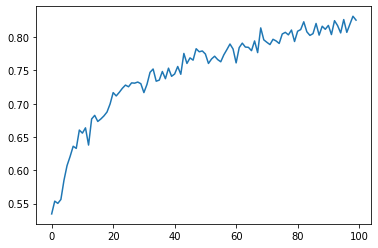

In [45]:
plt.plot(results.history['acc'])

In [48]:
model.save('cat_dog_classification.h5')

### Load my model and predicting on new images

In [2]:
from keras.models import load_model

Using TensorFlow backend.


In [3]:
model = load_model("cat_dog_classification.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [4]:
import numpy as np

def show_result(test_image):
    test_image = cv2.resize(test_image,(150,150))
    test_image = test_image/255
    test_image = test_image.reshape(1,150,150,3)
    
    
    prediction = model.predict_classes(test_image)
    prediction_prob = model.predict(test_image)
    
    if prediction.max()==1:
        return "DOG:  {}%".format(str(np.round(prediction_prob.max()*100,2))),
    else:
        return "CAT: {}%".format(str(np.round(prediction_prob.max()*100,2))),

('DOG:  99.93%',)


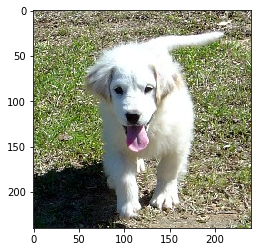

In [178]:
import cv2

rand = np.random.randint(9500,12499)
test_image = cv2.imread("CATS_DOGS/test/DOG/{}.jpg".format(str(rand)))
test_image = cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)

text = show_result(test_image)

plt.imshow(test_image)
print (text)


('CAT: 47.65%',)


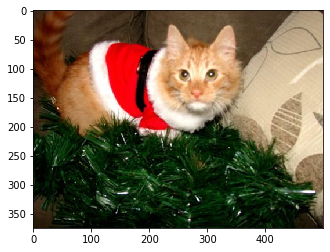

In [128]:
rand = np.random.randint(9500,12499)
test_image = cv2.imread("CATS_DOGS/test/CAT/{}.jpg".format(str(rand)))
test_image = cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)

text = show_result(test_image)

plt.imshow(test_image)
print (text)
